In [1]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [5]:
import io

df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.drop(columns=['RowNumber', 'CustomerId'], inplace=True)

In [8]:
df = pd.get_dummies(df,columns=['Geography', 'Gender'], drop_first=True)

In [9]:
df.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
df.shape

(10000, 13)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Surname            10000 non-null  object 
 1   CreditScore        10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), object(1), uint8(3)
memory usage: 810.7+ KB


In [30]:
df.drop(columns='Surname',inplace=True)

In [31]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


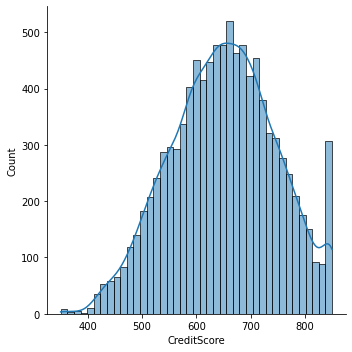

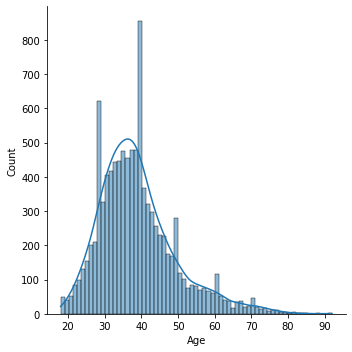

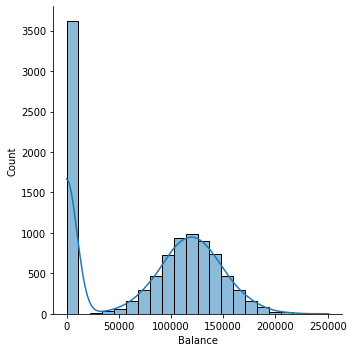

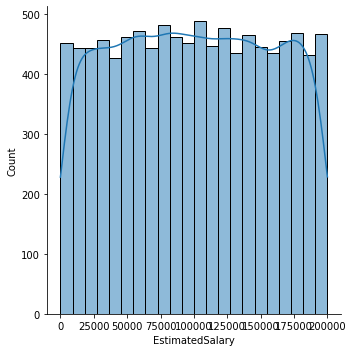

In [51]:
feature = ['CreditScore','Age','Balance','EstimatedSalary']

for i in feature:
  display(sns.displot(df[i],kde=True))

In [32]:
X = df.drop(columns='Exited')
y = df['Exited'].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [35]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [42]:
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 4ms/step - loss: 0.5556 - accuracy: 0.7619 - val_loss: 0.4793 - val_accuracy: 0.7987
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.7934 - val_loss: 0.4575 - val_accuracy: 0.7987
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7934 - val_loss: 0.4399 - val_accuracy: 0.7987
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.7942 - val_loss: 0.4261 - val_accuracy: 0.8056
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4309 - accuracy: 0.8030 - val_loss: 0.4165 - val_accuracy: 0.8219
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.8142 - val_loss: 0.4077 - val_accuracy: 0.8219
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.8177 - val_loss: 0.3995 - val_accuracy: 0.8275

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array([[0.18617108],
       [0.05557516],
       [0.05557516],
       ...,
       [0.05557516],
       [0.05557516],
       [0.18617108]], dtype=float32)

In [45]:
y_pred = y_pred.argmax(axis=1)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8035

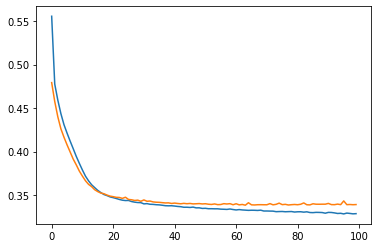

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

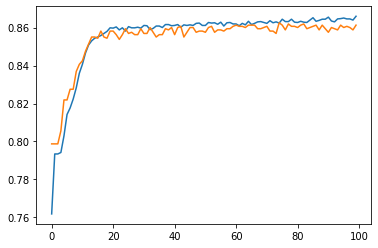

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])